In [2]:
import pandas as pd
webmd = pd.read_csv('webmd.csv')

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
webmd.head(25)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
5,55-64,Other,7/19/2008,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,,0
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
7,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
8,25-34,Acne,4/27/2016,wymzya fe,163180,4,2,,2,Female,"Nausea , vomiting , headache , bloating , ...",1
9,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0


In [7]:
webmd.columns.tolist()

['Age',
 'Condition',
 'Date',
 'Drug',
 'DrugId',
 'EaseofUse',
 'Effectiveness',
 'Reviews',
 'Satisfaction',
 'Sex',
 'Sides',
 'UsefulCount']

In [8]:
webmd.describe()   #drug id irrelevant for stats

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [14]:
webmd['EaseofUse'].value_counts()

5     192650
4      74732
3      41303
1      35927
2      18191
6          2
10         1
Name: EaseofUse, dtype: int64

In [22]:
webmd['EaseofUse'].replace({6:5,10:5},inplace=True)
webmd['EaseofUse'].value_counts()

5    192653
4     74732
3     41303
1     35927
2     18191
Name: EaseofUse, dtype: int64

In [32]:
webmd['Effectiveness'].value_counts()

5     130388
4      81821
3      60406
1      59387
2      30801
6          2
10         1
Name: Effectiveness, dtype: int64

In [39]:
outies=webmd.loc[webmd['Effectiveness']>5]
outies   #all for migraine medications=relevant?
#appears the 6's are duplicates

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
195073,35-44,Migraine Prevention,5/18/2009,"topamax capsule, sprinkle",14494,5,6,ahoj som zo slovenska dlhe roky mam migreny tu...,6,Female,"Tiredness, drowsiness, dizziness , loss of co...",0
195282,35-44,Migraine Prevention,5/18/2009,topamax,14494,5,6,ahoj som zo slovenska dlhe roky mam migreny tu...,6,Female,"Tiredness, drowsiness, dizziness , loss of co...",0
273577,45-54,Other,6/12/2013,fiorinal with codeine #3,2421,5,10,.,10,,"Nausea , vomiting , stomach upset, gas, sha...",5


Text(0.5, 1.0, 'Overall Ease of Use Ratings')

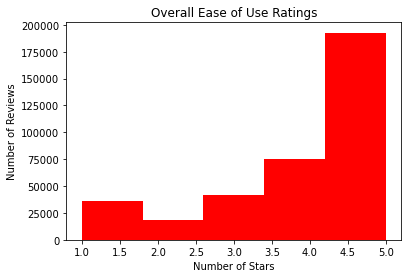

In [25]:
plt.hist(webmd['EaseofUse'], bins=5, color='red') #, xlabel='Number of Stars', ylabel='Number of Reviews');
plt.xlabel('Number of Stars')
plt.ylabel('Number of Reviews')
plt.title('Overall Ease of Use Ratings')

In [27]:
easiest2use=webmd.loc[webmd['EaseofUse']==5]

In [29]:
easiest2use.head(10)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
7,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
10,65-74,Other,3/15/2016,pyrogallol crystals,12112,5,5,Excellent in reducing inlamation associated wi...,5,Male,,0
11,19-24,Birth Control,11/17/2018,lyza,164750,5,5,Taking Lyza made me break out HORRIBLY. I trie...,2,,"Nausea , vomiting , headache , bloating , ...",0
14,35-44,Birth Control,2/13/2018,lyza,164750,5,5,I was concerned about starting a bc pill due t...,5,,"Nausea , vomiting , headache , bloating , ...",0
18,25-34,Birth Control,1/30/2017,lyza,164750,5,5,I have been taking Lyza for two months now. I ...,4,Female,"Nausea , vomiting , headache , bloating , ...",1
20,35-44,Birth Control,5/6/2016,lyza,164750,5,5,I took this pill for a month. It was so awful ...,1,,"Nausea , vomiting , headache , bloating , ...",3
21,25-34,Birth Control,4/29/2016,lyza,164750,5,5,My OB/GYN placed me on this pill because I was...,4,Female,"Nausea , vomiting , headache , bloating , ...",10
